In [12]:
# Import packages
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# Tell notebook server to show plots inline
%matplotlib inline

In [13]:
x_dat, y_d, y_e =np.loadtxt ('5bl-capstone.csv', delimiter=',', skiprows=1, usecols= (0,1,2), unpack=True)
y_dat = y_d**2
y_err = 2*y_d*y_e

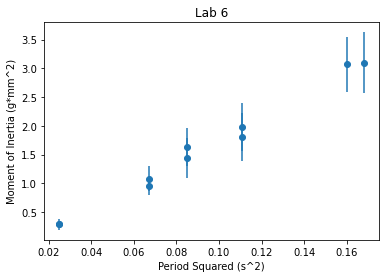

In [14]:
plt.errorbar(x_dat, y_dat, yerr=y_err, fmt='o')
plt.xlabel('Period Squared (s^2)')
plt.ylabel('Moment of Inertia (g*mm^2)')
plt.title("Lab 6")
plt.show() #using default size figure

In [15]:
# Define model functions  -- the independent variable has to be the first argument

#proportional model y=mx
def model_prop(x,m):
    return m*x

#linear model y=mx+c
def model_lin(x,m,c):
    return m*x + c

In [16]:
# The order of the parameter array elements p0, lin_opt, and lin_cov
# are determined by their order [m,b] in the model definition, model_lin(x,m,b):
# we are using an unweighted fit

# Set initial parameters mInit and bInit
mInit=4924
cInit=680

#fit the unweighted model y=mx+b
lin_opt, lin_cov = opt.curve_fit(model_lin, x_dat, y_dat, p0=[mInit,cInit])

In [17]:
# Predicted values
y_lin = model_lin(x_dat, lin_opt[0], lin_opt[1])

#error in the fit variables
lin_err = np.sqrt(np.diag(lin_cov))  

print('m = {0:6.4f} ± {1:5.4f} m/N'.format(lin_opt[0], lin_err[0]))
print(f"c = {lin_opt[1]:.4f} ±  {lin_err[1]:.4f} m")

m = 20.0656 ± 0.7530 m/N
c = -0.2510 ±  0.0765 m


In [18]:
# Calculating the chisq (*not reduced*)
def chisq(predicted, observed, errors):
    res = observed-predicted
    norm_res = res / errors 
    return np.sum(norm_res**2)
#chi squared for linear case
chi2_lin = chisq(y_lin, y_dat, y_err)

print('χ2 =', chi2_lin) #unformatted, as an example

χ2 = 2.178104974710072


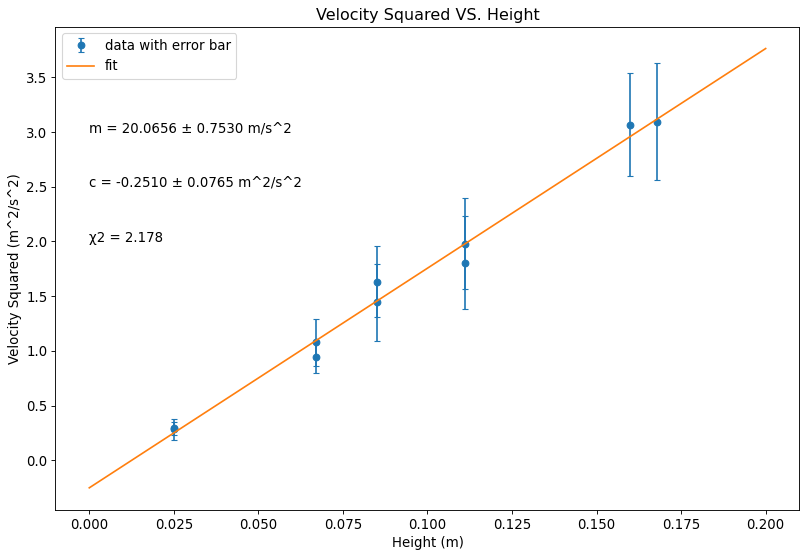

In [21]:
# Best-fit plot with error bars, parameters, chisq

# Sets figure size etc.
fig1=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

# Data with error bars
plt.errorbar(x_dat, y_dat, y_err, fmt='o', capsize = 3, capthick = 1, label="data with error bar")

# Best linear fit 
# could also use: plt.plot(np.linspace(0,10), model_lin(np.linspace(0,10), lin_opt[0], lin_opt[1]), label='fit')
plt.errorbar(np.linspace(0,0.2), model_lin(np.linspace(0,0.2), lin_opt[0], lin_opt[1]), label='fit')

# Axes label and title
plt.title("Velocity Squared VS. Height")
plt.xlabel("Height (m)")
plt.ylabel("Velocity Squared (m^2/s^2)")

# Best fit parameters, uncertainties, and chisq
plt.text(0,3, "m = %5.4f \u00b1 %5.4f m/s^2" % (lin_opt[0], lin_err[0]))
plt.text(0,2.5, "c = %5.4f \u00b1 %5.4f m^2/s^2" % (lin_opt[1], lin_err[1]))
plt.text(0,2, "χ2 = %5.3f" % chi2_lin)
plt.legend()
plt.show()

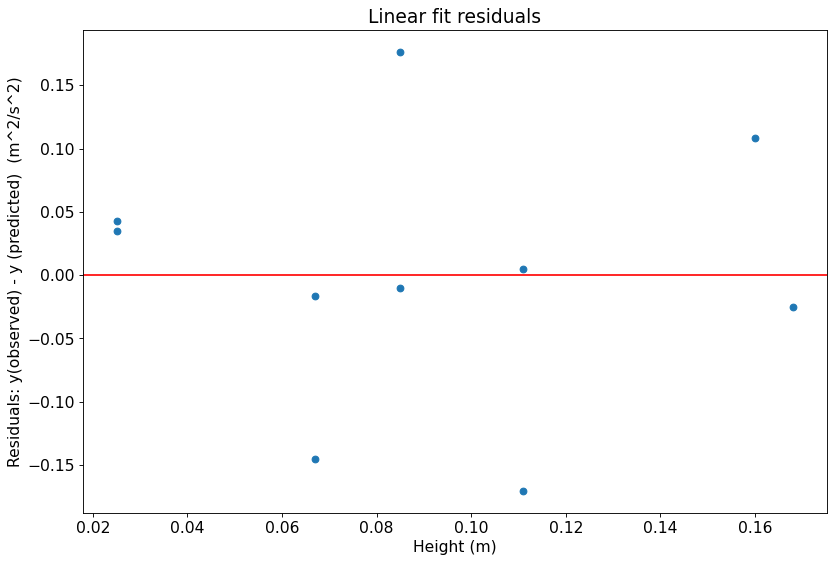

In [22]:
# Residuals plot

# Residuals
r_lin = y_dat- y_lin

# Sets figure size etc.
fig2=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '14'})

# Residuals
plt.errorbar(x_dat, r_lin, fmt='o')
plt.axhline(color='r') # 0 line for reference

# Axes label and title
plt.title("Linear fit residuals")
plt.xlabel("Height (m)")
plt.ylabel("Residuals: y(observed) - y (predicted)  (m^2/s^2)")
plt.show()